In [53]:
import numpy as np
import pandas as pd
import warnings 
import tensorflow as tf # import tensor flow 
import numpy as np
import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [54]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [55]:
len(train_data),len(test_data)

(8982, 2246)

In [56]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [57]:
print(test_data[1000])

[1, 10, 37, 38, 2968, 2598, 103, 727, 27, 4, 37, 38, 1829, 3257, 8424, 8174, 23, 7, 4, 1150, 3213, 1195, 3252, 1873, 907, 69, 4, 3194, 5, 871, 410, 4, 1305, 5, 782, 37, 38, 173, 8, 145, 51, 3471, 176, 6412, 2, 8, 24, 1122, 4, 3426, 829, 857, 34, 7, 4, 1507, 299, 45, 1536, 4, 214, 212, 34, 6442, 10, 73, 3158, 6, 782, 112, 9780, 2339, 21, 871, 7, 4, 6942, 403, 1801, 849, 24, 40, 4646, 36, 8, 129, 2044, 23, 370, 1757, 36, 8, 24, 4, 8424, 8174, 23, 374, 7, 42, 654, 696, 16, 2718, 535, 890, 1119, 890, 7, 4, 2429, 696, 890, 8225, 6, 30, 890, 85, 144, 13, 117, 10, 139, 4, 8424, 8174, 9, 25, 857, 5, 6732, 23, 4, 8449, 5, 4, 37, 38, 2193, 3575, 2598, 103, 50, 2, 10, 5850, 654, 3875, 22, 4, 2193, 2, 250, 4, 3213, 1195, 31, 4, 8424, 8174, 9, 25, 103, 7, 4, 3213, 1195, 6, 4, 354, 9, 4, 37, 38, 3727, 5943, 857, 7, 4, 6942, 403, 6, 4, 681, 4, 214, 212, 40, 83, 2961, 21, 1196, 153, 5, 4, 1721, 8281, 5, 3947, 4, 3471, 43, 23, 25, 7522, 487, 6, 4376, 4, 4012, 2, 5, 4, 1094, 58, 432, 77, 62, 84, 6, 278,

In [58]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

In [59]:
train_labels[10]

3

In [60]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)#1
x_test = vectorize_sequences(test_data)#2

In [61]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)#1
one_hot_test_labels = to_one_hot(test_labels)#2

In [62]:
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [63]:
model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(46, activation='softmax')
])

In [64]:
 model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [65]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [66]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 65ms/step - loss: 2.7107 - accuracy: 0.4817 - val_loss: 1.8310 - val_accuracy: 0.5940
Epoch 2/20
16/16 [==============================] - 0s 27ms/step - loss: 1.5562 - accuracy: 0.6594 - val_loss: 1.3783 - val_accuracy: 0.6910
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.1932 - accuracy: 0.7378 - val_loss: 1.1961 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.9786 - accuracy: 0.7859 - val_loss: 1.0908 - val_accuracy: 0.7590
Epoch 5/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8108 - accuracy: 0.8225 - val_loss: 1.0201 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6813 - accuracy: 0.8549 - val_loss: 0.9582 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 28ms/step - loss: 0.5662 - accuracy: 0.8794 - val_loss: 0.9135 - val_accuracy: 0.8000
Epoch 8/20
16

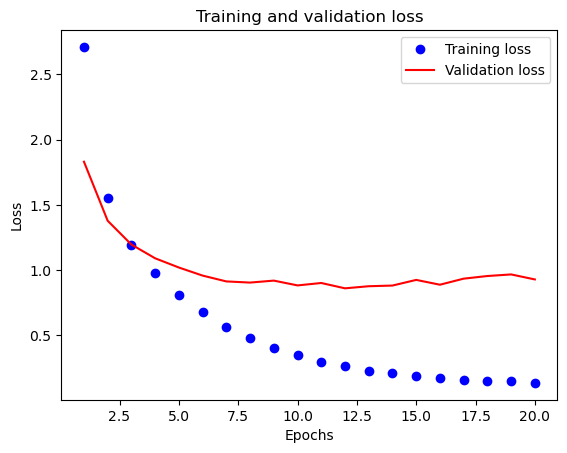

In [67]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

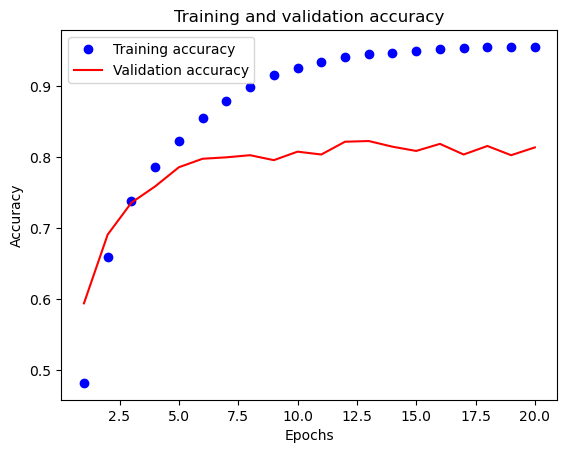

In [68]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
model = keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(46, activation='softmax')
])
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/10
16/16 [==============================] - 3s 68ms/step - loss: 2.7591 - accuracy: 0.4731 - val_loss: 1.8417 - val_accuracy: 0.6080
Epoch 2/10
16/16 [==============================] - 0s 27ms/step - loss: 1.5591 - accuracy: 0.6761 - val_loss: 1.3885 - val_accuracy: 0.6780
Epoch 3/10
16/16 [==============================] - 0s 23ms/step - loss: 1.1850 - accuracy: 0.7459 - val_loss: 1.2021 - val_accuracy: 0.7320
Epoch 4/10
16/16 [==============================] - 0s 23ms/step - loss: 0.9640 - accuracy: 0.7965 - val_loss: 1.0839 - val_accuracy: 0.7870
Epoch 5/10
16/16 [==============================] - 0s 24ms/step - loss: 0.7990 - accuracy: 0.8324 - val_loss: 1.0188 - val_accuracy: 0.7880
Epoch 6/10
16/16 [==============================] - 0s 24ms/step - loss: 0.6678 - accuracy: 0.8603 - val_loss: 0.9624 - val_accuracy: 0.7880
Epoch 7/10
16/16 [==============================] - 0s 22ms/step - loss: 0.5616 - accuracy: 0.8822 - val_loss: 0.9373 - val_accuracy: 0.7980
Epoch 8/10
16

In [70]:
results

[0.9512938261032104, 0.7867319583892822]

In [71]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.1861086375779163

In [72]:
 predictions = model.predict(x_test)

71/71 [==============================] - 1s 5ms/step


In [74]:
predictions[0].shape

(46,)

In [75]:
np.sum(predictions[0])

1.0000002

In [76]:
np.argmax(predictions[0])

3